<a href="https://colab.research.google.com/github/u1456757/IS4487/blob/main/Assignments/assignment_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [7]:
import os
print(f"Current working directory: {os.getcwd()}")
!wget https://raw.githubusercontent.com/u1456757/IS4487/main/DataSets/adviseinvest_historical_data.csv

if os.path.exists('adviseinvest_historical_data.csv'):
    df = pd.read_csv('adviseinvest_historical_data.csv')
    display(df.head())
else:
    print("Error: 'adviseinvest_historical_data.csv not found after attempted download. Please check the URL and your internet connection.")

Current working directory: /content
--2026-01-29 02:19:23--  https://raw.githubusercontent.com/u1456757/IS4487/main/DataSets/adviseinvest_historical_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 971858 (949K) [text/plain]
Saving to: ‘adviseinvest_historical_data.csv’

adviseinvest_histor 100%[===================>] 949.08K  --.-KB/s    in 0.05s   

2026-01-29 02:19:23 (16.9 MB/s) - ‘adviseinvest_historical_data.csv’ saved [971858/971858]



,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [9]:
df.describe()

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


# Step 2: Exploratory Data Analysis (EDA)
### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

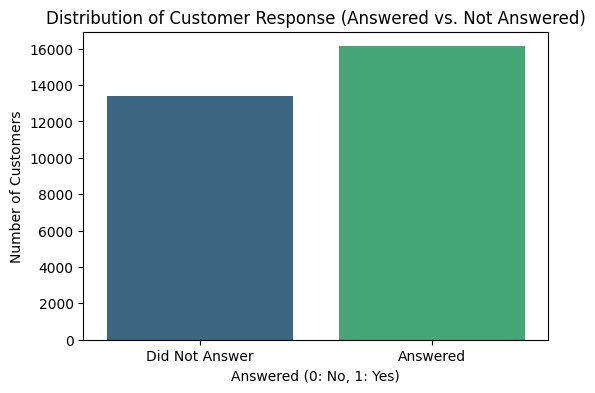

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chart 1: Distribution of the target variable 'answered'
plt.figure(figsize=(6, 4))
sns.countplot(x='answered', data=df, palette='viridis', hue='answered', legend=False)
plt.title('Distribution of Customer Response (Answered vs. Not Answered)')
plt.xlabel('Answered (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Did Not Answer', 'Answered'])
plt.show()

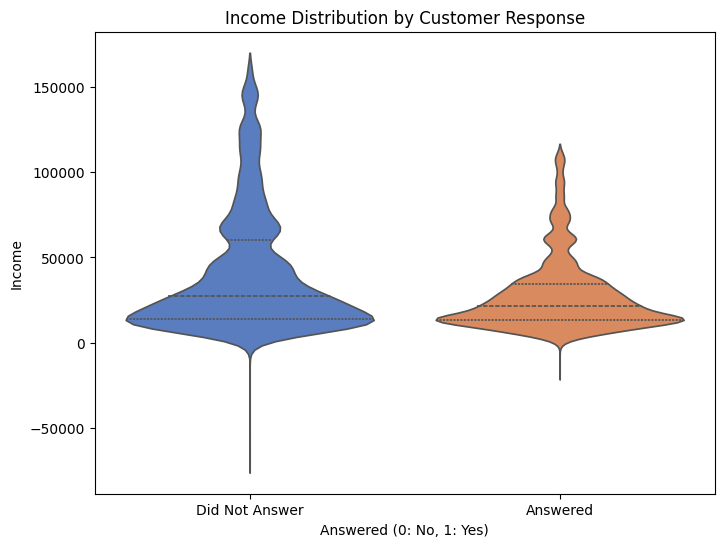

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='answered', y='income', data=df, palette='muted', inner='quartile', hue='answered', legend=False)
plt.title('Income Distribution by Customer Response')
plt.xlabel('Answered (0: No, 1: Yes)')
plt.ylabel('Income')
plt.xticks(ticks=[0, 1], labels=['Did Not Answer', 'Answered'])
plt.show()

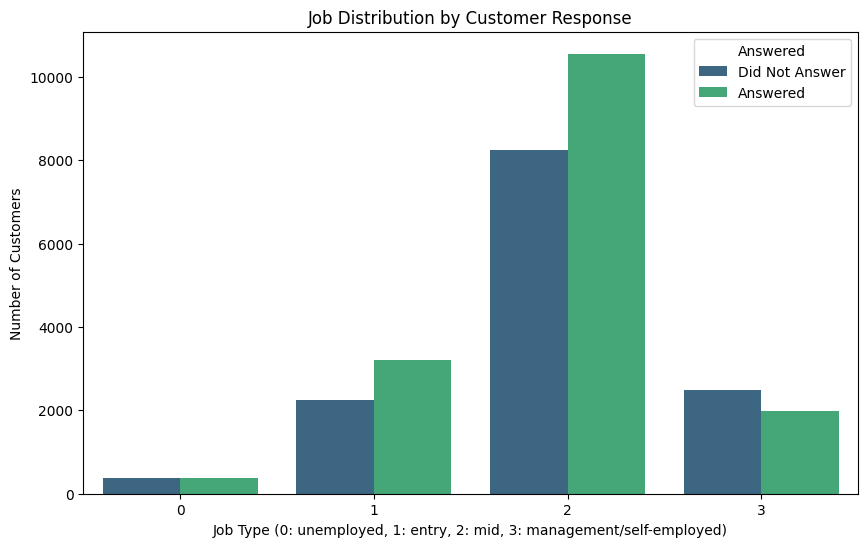

In [14]:
# Chart 3: Distribution of 'job' by 'answered'
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='answered', data=df, palette='viridis')
plt.title('Job Distribution by Customer Response')
plt.xlabel('Job Type (0: unemployed, 1: entry, 2: mid, 3: management/self-employed)')
plt.ylabel('Number of Customers')
plt.legend(title='Answered', labels=['Did Not Answer', 'Answered'])
plt.show()

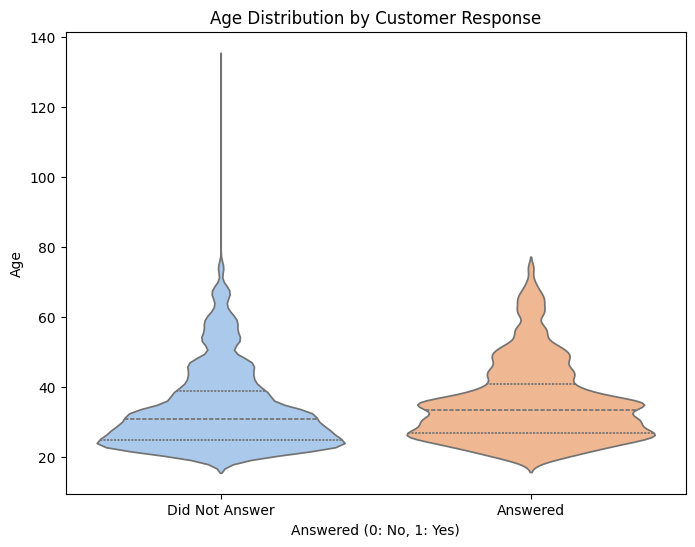

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='answered', y='age', data=df, palette='pastel', inner='quartile', hue='answered', legend=False)
plt.title('Age Distribution by Customer Response')
plt.xlabel('Answered (0: No, 1: Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Did Not Answer', 'Answered'])
plt.show()

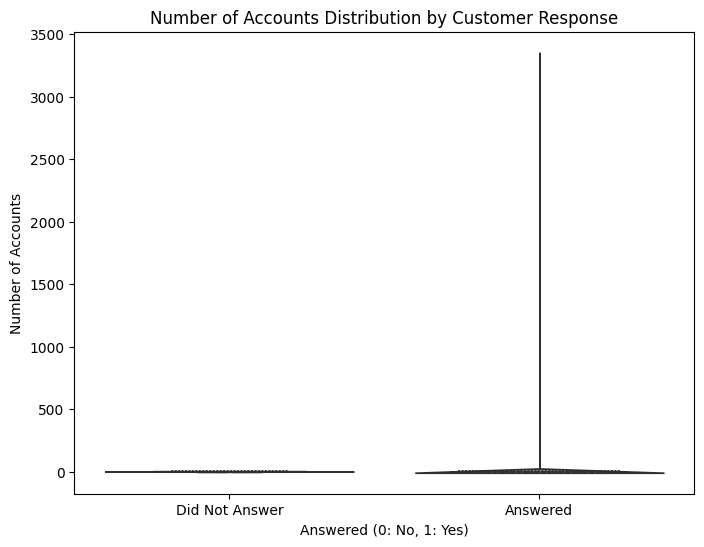

In [16]:
# Chart 5: Distribution of 'num_accts' by 'answered'
plt.figure(figsize=(8, 6))
sns.violinplot(x='answered', y='num_accts', data=df, palette='cubehelix', inner='quartile', hue='answered', legend=False)
plt.title('Number of Accounts Distribution by Customer Response')
plt.xlabel('Answered (0: No, 1: Yes)')
plt.ylabel('Number of Accounts')
plt.xticks(ticks=[0, 1], labels=['Did Not Answer', 'Answered'])
plt.show()

# Step 3: Summarize Your Findings
Question 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

Not all variables are directly useful or applicable in their current state due to data quality issues, but many have potential correlation with the target answered once cleaned. Variables like mobile are highly likely to be correlated, while others like income, age, and num_accts need significant cleaning to assess their true predictive power.

Question 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

### ✍️ Your Response: 🔧
3.2. Based on the initial data understanding and EDA, the AdviseInvest dataset could be significantly improved by addressing several data quality issues and data type inconsistencies. This includes handling the 2 missing values in the new_car column, and critically addressing severe outliers in numerical columns such as income (negative values and extremely high values), age (age 132), and num_accts (up to 3345 accounts), as these likely represent data entry errors. Additionally, the female column, currently an object type, needs to be converted to a numerical type for proper analysis. While other categorical variables like job, chk_acct, sav_acct, and product are numerically encoded, converting them to a category data type or applying one-hot encoding might be beneficial for certain modeling techniques. By cleaning these issues, the dataset will be more reliable for further analysis and modeling, ensuring that insights derived are based on accurate and consistent data.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [18]:
!jupyter nbconvert --to html "assignment_04_GuerreroDiego.ipynb"

[NbConvertApp] Converting notebook assignment_04_GuerreroDiego.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 541743 bytes to assignment_04_GuerreroDiego.html
